In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("/content/drive/MyDrive/projects/first step in econometrics")
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import t

4章

In [2]:
# 4-A
df = pd.DataFrame(
    np.array([[55, 52, 61, 55, 63, 47, 45, 54, 59, 50, 43], [55, 58, 63, 59, 62, 55, 51, 52, 62, 49, 50], [0, 6, 2, 4, -1, 8, 6, -2, 3, -1, 7]]).T,
    columns=["前", "後", "変化"]
)
display(df.mean())

# 有意水準
sl = 0.05

mu = df["変化"].mean()
var = df["変化"].var()
n = len(df)
tstat = (mu-0) / np.sqrt(var/n)

print(tstat)
# 両側
print(2.23 < tstat)
# 片側
print(1.81 < tstat)


# 4-B
print(t.isf(q=0.025, df=5))
print(t.isf(q=0.025, df=10))
print(t.isf(q=0.025, df=100))
print(t.isf(q=0.025, df=1000))

前     53.090909
後     56.000000
変化     2.909091
dtype: float64

2.7083654762621308
True
True
2.57058183661474
2.2281388519649385
1.983971518449634
1.9623390808264078


5章

In [3]:
# 5-A
df = pd.read_csv("data/5_1_income.csv")
display(df.head())

y = df['income']
X = df['yeduc']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# 外的条件が制御されているとき、X=xの時のYの平均的な成果をXβ1+β0でモデル化している(p100参照)
print(results.summary())

,yeduc,income,lincome,lyeduc
0,9,100.0,4.605170,2.197225
1,9,50.0,3.912023,2.197225
2,9,150.0,5.010635,2.197225
3,9,200.0,5.298317,2.197225
4,9,150.0,5.010635,2.197225


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     279.7
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           6.85e-61
Time:                        04:57:26   Log-Likelihood:                -28390.
No. Observations:                4327   AIC:                         5.678e+04
Df Residuals:                    4325   BIC:                         5.680e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.8928     19.357     -2.939      0.0

In [4]:
# 5-B
df = pd.read_csv("data/5_2_sleep.csv")
display(df.head())

y = df['commute']
X = df['sleep']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) # 睡眠時間が1分増えると、通勤時間が

,commute,sleep
0,0,330.0
1,0,325.0
2,0,352.5
3,0,405.0
4,0,330.0


                            OLS Regression Results                            
Dep. Variable:                commute   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     308.7
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.87e-66
Time:                        04:57:26   Log-Likelihood:                -16878.
No. Observations:                3726   AIC:                         3.376e+04
Df Residuals:                    3724   BIC:                         3.377e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.9667      3.275     27.774      0.0

In [5]:
# 5-C
df = pd.read_csv("data/5_3_abe.csv")
display(df.head())

y = df['income']
X = df['abe']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

,income,abe
0,0.0,25
1,0.0,10
2,0.0,25
3,0.0,35
4,0.0,20


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.85
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           0.000995
Time:                        04:57:27   Log-Likelihood:                -29441.
No. Observations:                4276   AIC:                         5.889e+04
Df Residuals:                    4274   BIC:                         5.890e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.9073     11.310     26.253      0.0

6章

In [10]:
def modeling(X, y):
    y = df[y]
    X = df[X] # yeducが修学年数、experが就業可能年数(最後の学校を卒業してからの年数)
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

In [6]:
# 6-A
df = pd.read_csv("data/6_1_income.csv")
display(df.head())

# ミンサー方程式(修学年数と所得の増加率の関係)
y = df['lincome']
X = df[["exper", "exper2", "yeduc"]] # yeducが修学年数、experが就業可能年数(最後の学校を卒業してからの年数)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

,exper,exper2,yeduc,income,lincome
0,7,49,9,100.0,4.605170
1,8,64,9,150.0,5.010635
2,8,64,9,150.0,5.010635
3,10,100,9,200.0,5.298317
4,10,100,9,300.0,5.703783


                            OLS Regression Results                            
Dep. Variable:                lincome   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.41e-215
Time:                        04:57:27   Log-Likelihood:                -5129.4
No. Observations:                4299   AIC:                         1.027e+04
Df Residuals:                    4295   BIC:                         1.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4855      0.111     22.436      0.0

,mocograd,pacograd,yeduc
0,0,0,11.0
1,0,0,9.0
2,0,0,11.0
3,0,0,12.0
4,0,0,11.0


                            OLS Regression Results                            
Dep. Variable:               mocograd   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     757.7
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          9.34e-153
Time:                        04:57:28   Log-Likelihood:                -271.76
No. Observations:                3954   AIC:                             547.5
Df Residuals:                    3952   BIC:                             560.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.005      3.061      0.0

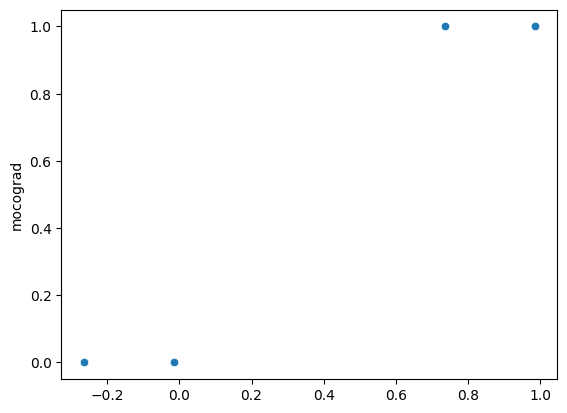

In [7]:
# 6-B
df = pd.read_csv("data/6_2_yeduc.csv")
display(df.head())

y = df['mocograd']
X = df["pacograd"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# 父親の学歴による影響が母親の学歴の影響に含まれてしまう
print(results.summary())

fig, ax = plt.subplots()
sns.scatterplot(x=results.resid, y=df["mocograd"], ax=ax)
plt.show()

In [8]:
# 修学年数(yeduc)を残差と定数項に回帰する
y = df['yeduc']
X = results.resid
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  yeduc   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     35.28
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           3.11e-09
Time:                        04:57:28   Log-Likelihood:                -6836.3
No. Observations:                3954   AIC:                         1.368e+04
Df Residuals:                    3952   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9613      0.022    643.718      0.0

In [12]:
# 6-C
df = pd.read_csv("data/6_3_happy_work.csv")
display(df.head())

results = modeling(["commute"], ["happy_work"])
print(results.summary()) # 有意水準5%で帰無仮説を棄却できない、係数は-

,commute,happy_work,income,yeduc
0,0,4,0.0,9
1,0,4,0.0,12
2,0,4,0.0,12
3,0,2,0.0,12
4,0,4,0.0,12


                            OLS Regression Results                            
Dep. Variable:             happy_work   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.965
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0852
Time:                        05:00:21   Log-Likelihood:                -5646.3
No. Observations:                3604   AIC:                         1.130e+04
Df Residuals:                    3602   BIC:                         1.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2255      0.034     65.945      0.0

In [13]:
results = modeling(["commute", "income", "yeduc"], ["happy_work"])
print(results.summary()) # 有意水準5%で帰無仮説を棄却できない

                            OLS Regression Results                            
Dep. Variable:             happy_work   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     13.82
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           5.87e-09
Time:                        05:01:40   Log-Likelihood:                -5627.2
No. Observations:                3604   AIC:                         1.126e+04
Df Residuals:                    3600   BIC:                         1.129e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8357      0.142     12.949      0.0

In [20]:
"""
複合仮説検定
yeducとincomeが満足度の外的条件となってるかを調べる
帰無仮説はyeducとincomeの回帰係数が二つとも0である
https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.f_test.html
"""

A = np.identity(len(results.params)) # constを含めたパラメータ*パラメータ数の単位行列を作る
A = A[2:, :] # constとincomeの列を削る
print(results.f_test(A))
#print(results.f_pvalue)

<F test: F=19.228815599486975, p=4.935392403229261e-09, df_denom=3.6e+03, df_num=2>
5.8688737853034785e-09


In [22]:
# 6-D
df = pd.read_csv("data/6_4_minshu.csv")
display(df.head())

results = modeling(["income"], ["minshu"])
print(results.summary())# incomeは統計的に有意

,income,minshu,yeduc
0,0.0,0,9
1,0.0,0,9
2,0.0,30,9
3,0.0,0,9
4,0.0,50,9


                            OLS Regression Results                            
Dep. Variable:                 minshu   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.317
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0378
Time:                        05:24:26   Log-Likelihood:                -18293.
No. Observations:                4218   AIC:                         3.659e+04
Df Residuals:                    4216   BIC:                         3.660e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8237      0.424    103.359      0.0

In [23]:
results = modeling(["income", "yeduc"], ["minshu"])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 minshu   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.518
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0110
Time:                        05:26:28   Log-Likelihood:                -18290.
No. Observations:                4218   AIC:                         3.659e+04
Df Residuals:                    4215   BIC:                         3.661e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3028      2.125     18.496      0.0

7章

In [25]:
# 7-A
df = pd.read_csv("data/7_1_income.csv")
display(df.head())

# femaleダミーを追加することで、男女間でlincomeの平均的な違いを考える
results = modeling(["yeduc", "female"], ["lincome"])
print(results.summary())

,female,yeduc,lincome,female_yeduc
0,0,9,4.605170,0
1,0,9,5.010635,0
2,0,9,4.605170,0
3,0,9,5.010635,0
4,0,9,5.329089,0


                            OLS Regression Results                            
Dep. Variable:                lincome   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     605.0
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.98e-232
Time:                        05:36:41   Log-Likelihood:                -5265.0
No. Observations:                4286   AIC:                         1.054e+04
Df Residuals:                    4283   BIC:                         1.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8633      0.096     50.593      0.0

In [31]:
# 7-B
df = pd.read_csv("data/7_3_happy_work.csv")
display(df.head())

# 男性と女性で平均的なhappy_work(femaleの追加)の違い、comuuteの増加による男女間の変化の違いがある(female_commuteの追加)と考える
results = modeling(["commute", "female", "female_commute"], ["happy_work"])
print(results.summary())

,commute,female,happy_work,income,yeduc,female_commute,female_yeduc,female_income
0,0,0,3,300.0,11,0,0,0.0
1,0,0,3,300.0,11,0,0,0.0
2,0,0,3,300.0,11,0,0,0.0
3,0,0,3,300.0,11,0,0,0.0
4,0,1,4,0.0,12,0,12,0.0


                            OLS Regression Results                            
Dep. Variable:             happy_work   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.384
Date:                Mon, 14 Aug 2023   Prob (F-statistic):            0.00437
Time:                        06:06:59   Log-Likelihood:                -4811.2
No. Observations:                3097   AIC:                             9630.
Df Residuals:                    3093   BIC:                             9655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2181      0.052     42.

In [32]:
# 男女間に違いがあるのかを、femaleとfemale_commuteの回帰係数のF検定から考える

A = np.identity(len(results.params))
A = A[2:, :]
print(results.f_test(A)) # p値が0.05を下回らないので、回帰係数が両方0という帰無仮説を棄却できない

<F test: F=1.7879482896752137, p=0.16747594680928699, df_denom=3.09e+03, df_num=2>


In [33]:
# 男性だけ
df = pd.read_csv("data/7_3_happy_work.csv").query("female!=1")
results = modeling(["commute"], ["happy_work"])
print(results.summary())

# 女性だけ
df = pd.read_csv("data/7_3_happy_work.csv").query("female==1")
results = modeling(["commute"], ["happy_work"])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             happy_work   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.122
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0774
Time:                        06:10:55   Log-Likelihood:                -2594.9
No. Observations:                1659   AIC:                             5194.
Df Residuals:                    1657   BIC:                             5205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2181      0.052     42.386      0.0

In [39]:
# 7-C
df = pd.read_csv("data/7_4_minshu.csv")
display(df.head())

# 都市部か否かで異なるか
results = modeling(["income", "yeduc", "city", "city_income", "city_yeduc"], ["minshu"])
print(results.summary())

,city,income,minshu,yeduc,city_income,city_yeduc
0,0,0.0,0,9,0.0,0
1,0,0.0,50,9,0.0,0
2,0,0.0,40,9,0.0,0
3,0,0.0,50,9,0.0,0
4,0,0.0,50,9,0.0,0


                            OLS Regression Results                            
Dep. Variable:                 minshu   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.033
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           0.000133
Time:                        06:23:24   Log-Likelihood:                -18213.
No. Observations:                4218   AIC:                         3.644e+04
Df Residuals:                    4212   BIC:                         3.648e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          40.9451      3.267     12.532      

In [40]:
A = np.identity(len(results.params))
A = A[3:, :]
print(results.f_test(A)) # p値が0.05を下回らないので、回帰係数が両方0という帰無仮説を棄却できない

<F test: F=2.313574909378616, p=0.0739712801066044, df_denom=4.21e+03, df_num=3>


In [45]:
# 7-D
df = pd.read_csv("data/7_2_work.csv")
display(df.head())

results = modeling(["childu6", "income_s", "mowork15"], ["work"])
print(results.summary())

,childu6,income_s,mowork15,work
0,0,0.0,1,0
1,0,0.0,1,0
2,1,0.0,0,1
3,1,0.0,1,1
4,0,12.5,0,0


                            OLS Regression Results                            
Dep. Variable:                   work   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     22.85
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           2.48e-14
Time:                        06:42:02   Log-Likelihood:                -722.21
No. Observations:                1053   AIC:                             1452.
Df Residuals:                    1049   BIC:                             1472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6806      0.044     15.393      0.0

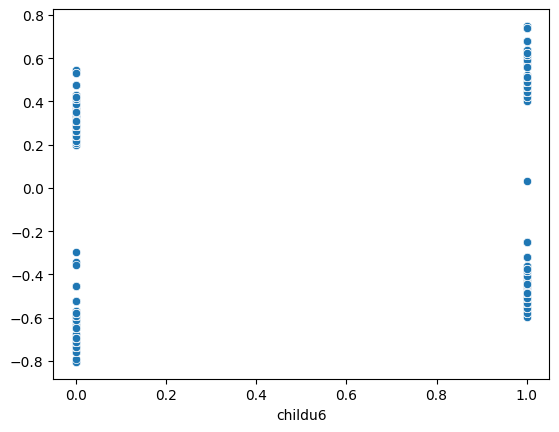

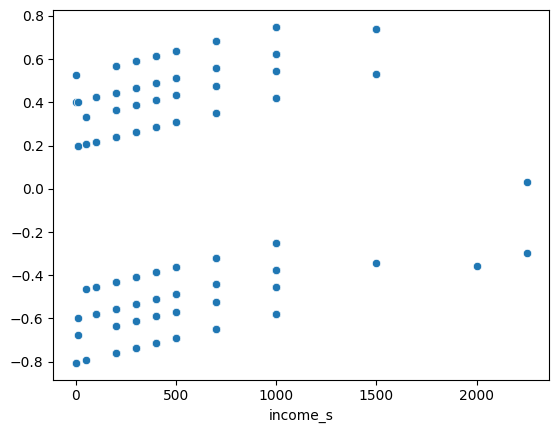

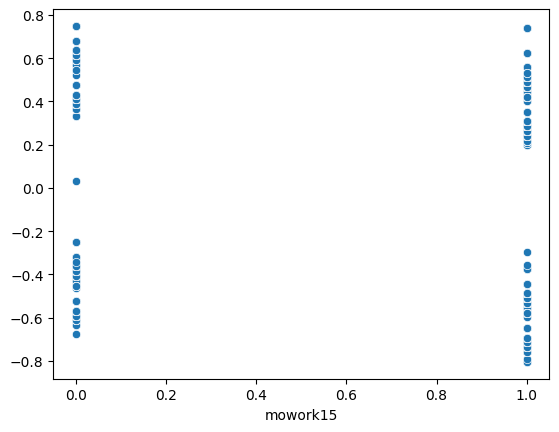

(27.513787912928223,
 0.0002692602266696776,
 4.005334672347981,
 0.00024569811813423095)

In [47]:
from statsmodels.stats.api import het_breuschpagan, het_white
# 誤差項の分散の均一性をみる(説明変数の値によって、誤差項の散らばり方がことならないか)
for col in ["childu6", "income_s", "mowork15"]:
    fig, ax = plt.subplots()
    sns.scatterplot(x=df[col], y=results.resid, ax=ax)
    plt.show()


het_white(results.resid, results.model.exog)

In [53]:
# 頑健な標準誤差を使ってp値などを計算する
print(results.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:                   work   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     23.38
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.18e-14
Time:                        07:37:08   Log-Likelihood:                -722.21
No. Observations:                1053   AIC:                             1452.
Df Residuals:                    1049   BIC:                             1472.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6806      0.044     15.334      0.0